In the first tutorial, we looked at how to solve for the entropy of mixing for a regular solution, and then we looked at how a highly ordered system with grouped species tends toward a more uniformly distributed system. 

Now we will add the effects of enthalpic interaction between the species.

In the pure state, interaction energy are between species 1 and itself and the interaction energy between species 2 and itself are, respectively, $w_{11}$ and $w_{22}$. Molecules of the same type attract one another via van der waals forces, so $w_{11}$ and $w_{22}$ are negative.

The enthalpy of the pure states are:

$H_1 = \frac{1}{2}m_1 z w_{11}$
 
$H_2 = \frac{1}{2}m_2 z w_{22}$

The 1/2 is because with z interactions (pairs of molecules - eg i with j and j with i) there are double the number of interactions as there are pairs.

We assume that the molecules only interact with nearest neighbors. 

What about cross-species interaction energies though? ie $w_{12}$

The enthalpy of the mixture is the sum of the number of species 1 interactions and species 2 interactions, each divided by two again due to the double counting of interactions when considering each particle.

Let's look at this with two approaches. In the first approach, we will render a lattice of species 1 and species 2 particles, and algorithmically count the interaction energies in the lattice. In the second, quicker approach, we will use the analytical expression for enthalpy which should give us a similar value as with the brute force counting method.


In [93]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from random import random

def box(lattice_width, lattice_height,m_1_probability): # define a new function that builds a lattice w 2 species
    lattice_width = lattice_width
    lattice_height = lattice_height
    m_sites = lattice_width*lattice_height 
    lattice = np.zeros((lattice_height,lattice_width))
    m_2_probability = m_1_probability

    m_1 = 0
    m_2 = 0

    for i in range(0,lattice_height): 
        for j in range(0,lattice_width):
            random_number = random()
            if random_number > m_2_probability:
                lattice[i,j] = 1
                m_1 += 1
            else:
                lattice[i,j] = 2
                m_2 += 1
    print 'm_1, m_2, m_sites =', m_1, m_2, m_sites
    
    return m_1, m_2, m_sites, lattice # output the lattice matrix itself and the counts of species 1, 2, and total


In [94]:
def enthalpy(w_11,w_12,w_22,lattice,m_1,m_2,m_sites):
    H_mix = 0.
    lattice = lattice
    w_12 = w_12
    w_22 = w_22
    w_11 = w_11
    lattice_height = len(lattice[:,0])
    lattice_width = len(lattice[0,:])
    for i in range(0,lattice_height):
        for j in range(0,lattice_width):                
            #find the nearest neighbors - use modulo to enforce periodic bound. cond.
            #examine edge to the right of current cell
            if lattice[((i+0)%lattice_height),((j+1)%lattice_width)] == lattice[i,j]: 
                if lattice[i,j] == 2:
                    H_mix += w_22
                else:
                    H_mix += w_11
            else: 
                H_mix += w_12
            #examine edge beneath the current cell
            if lattice[((i-1)%lattice_height),((j+0)%lattice_width)] == lattice[i,j]:
                if lattice[i,j] == 2:
                    H_mix += w_22
                else:
                    H_mix += w_11
            else: 
                H_mix += w_12
    x_1 = m_1/m_sites
    x_2 = m_2/m_sites
    z = 4.
    H_mix_analytical = (0.5)*(m_1*(z*x_1*w_11 + z*x_2*w_12) + m_2*(z*x_1*w_12 + z*x_2*w_22))
    h_1_analytical = 0.5*m_1*z*w_11
    h_2_analytical = 0.5*m_2*z*w_22
    return H_mix_analytical, H_mix, h_1_analytical, h_2_analytical

m_1, m_2, m_sites = 302 98 400
-1288.04 -1268.0 -604.0 -980.0


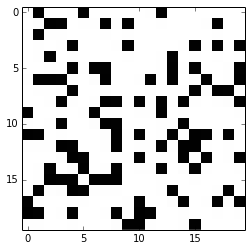

In [95]:
lattice_height_mixed = 10
lattice_width_mixed = 10
m_2_probability = 0.2
w_12 = -2.
w_22 = -5.
w_11 = -1.
m_1_mixed, m_2_mixed, m_sites_mixed, lattice_mixed = box(lattice_width,lattice_height,m_2_probability)
plt.imshow(lattice_mixed,cmap="Greys",interpolation='None')
h_mixed_analytical, h_mixed_numerical, h_1_analytical, h_2_analytical = enthalpy(w_11,w_12,w_22,lattice_mixed,m_1_mixed, m_2_mixed, m_sites_mixed)
print h_mixed_analytical, h_mixed_numerical, h_1_analytical, h_2_analytical

In [96]:
lattice_height_pure1 = 1
lattice_width_pure1 = m_1
m_1_pure1, m_2_pure1, m_sites_pure1, lattice_pure1 = box(lattice_width_pure1,lattice_height_pure1,0)
h_pure1_analytical, h_pure1_numerical,h_1_analytical, h_2_analytical = enthalpy(w_11,w_12,w_22,lattice_pure1,m_1_pure1, m_2_pure1, m_sites_pure1)
print h_pure1_analytical, h_pure1_numerical

m_1, m_2, m_sites = 278 0 278
-556.0 -556.0


In [97]:
lattice_height_pure2 = 1
lattice_width_pure2 = m_2
m_1_pure2, m_2_pure2, m_sites_pure2, lattice_pure2 = box(lattice_width_pure2,lattice_height_pure2,1)
h_pure2_analytical, h_pure2_numerical,h_1_analytical, h_2_analytical = enthalpy(w_11,w_12,w_22,lattice_pure2,m_1_pure2, m_2_pure2, m_sites_pure2)
print h_pure2_analytical, h_pure2_numerical

m_1, m_2, m_sites = 0 122 122
-1220.0 -1220.0


In [98]:
h_mixed_analytical - h_pure1_analytical - h_pure2_analytical

487.96000000000004

In [99]:
h_mixed_numerical - h_pure1_numerical - h_pure2_numerical

508.0